In [1]:
path="C:\\Users\\pasum\\Desktop\\TrafficSigns Recognition\\myData"

In [2]:
labelsFile="C:\\Users\\pasum\\Desktop\\TrafficSigns Recognition\\labels.csv"

In [3]:
import os
import cv2

In [4]:
myList=os.listdir(path)

In [5]:
noOfClasses=len(myList)

In [6]:
noOfClasses

43

In [10]:
images=[]
classNo=[]
print("Importing Classes...")
for i in range(0,noOfClasses):
    myPicList=os.listdir(path + "/" + str(i))
    for y in myPicList:
        Img=cv2.imread(path + "/" + str(i) + "/" + y)
        images.append(Img)
        classNo.append(i)
    print(i, " Done")

Importing Classes...
0  Done
1  Done
2  Done
3  Done
4  Done
5  Done
6  Done
7  Done
8  Done
9  Done
10  Done
11  Done
12  Done
13  Done
14  Done
15  Done
16  Done
17  Done
18  Done
19  Done
20  Done
21  Done
22  Done
23  Done
24  Done
25  Done
26  Done
27  Done
28  Done
29  Done
30  Done
31  Done
32  Done
33  Done
34  Done
35  Done
36  Done
37  Done
38  Done
39  Done
40  Done
41  Done
42  Done


In [11]:
import numpy as np
images=np.array(images)
classNo=np.array(classNo)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(images,classNo,test_size=0.2)

In [15]:
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2)

In [16]:
X_train.shape

(22271, 32, 32, 3)

In [18]:
X_test.shape

(6960, 32, 32, 3)

In [19]:
X_validation.shape

(5568, 32, 32, 3)

In [20]:
import pandas as pd
data=pd.read_csv("C:\\Users\\pasum\\Desktop\\TrafficSigns Recognition\\labels.csv")

In [21]:
import matplotlib.pyplot as plt
import random

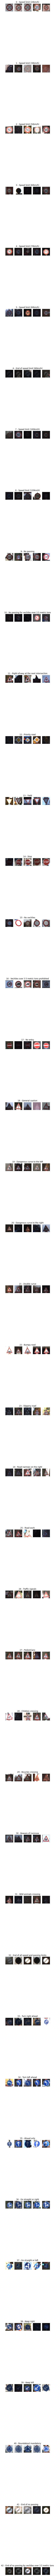

In [22]:
num_of_samples=[]
cols=5
num_Classes=noOfClasses
fig,axs=plt.subplots(nrows=num_Classes,ncols=cols,figsize=(5,300))
for i in range(cols):
    for j,row in data.iterrows():
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:])
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["Name"])
            num_of_samples.append(len(x_selected))

In [24]:
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255
    return img
    

In [25]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))


In [26]:
cv2.imshow("Grayscale Image",X_train[random.randint(0,len(X_train)-1)])
cv2.waitKey(0)

-1

In [27]:
X_train.shape

(22271, 32, 32)

In [28]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)

In [29]:
X_validation=X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [30]:
X_test.shape

(6960, 32, 32, 1)

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [33]:
dataGen.fit(X_train)
batches=dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch=next(batches)
imageDimensions=(32,32,3)

In [34]:
X_batch.shape

(20, 32, 32, 1)

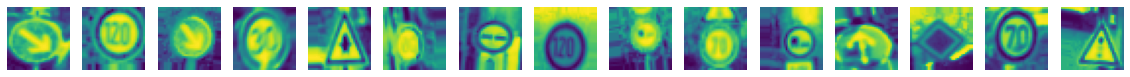

In [35]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis("off")
plt.show()

In [36]:
from keras.utils.np_utils import to_categorical

In [37]:
y_train=to_categorical(y_train,noOfClasses)
y_validation=to_categorical(y_validation,noOfClasses)
y_test=to_categorical(y_test,noOfClasses)

In [38]:
y_train.shape

(22271, 43)

In [39]:
y_validation.shape

(5568, 43)

In [40]:
y_test.shape

(6960, 43)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [53]:
model=Sequential()
model.add(Conv2D(60,(3,3),input_shape=(32,32,1),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation="elu"))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation="elu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(43,activation="softmax"))

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 60)        600       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 60)        240       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 60)        32460     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 60)        240       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 60)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 128)      

In [55]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [56]:
model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),validation_data=(X_validation,y_validation),epochs=20)

Epoch 1/20
446/446 [==============================] - 122s 273ms/step - loss: 2.5861 - accuracy: 0.3184 - val_loss: 2.3175 - val_accuracy: 0.3658
Epoch 2/20
446/446 [==============================] - 123s 275ms/step - loss: 1.2735 - accuracy: 0.5933 - val_loss: 0.7926 - val_accuracy: 0.7599
Epoch 3/20
446/446 [==============================] - 122s 272ms/step - loss: 0.8457 - accuracy: 0.7320 - val_loss: 0.2369 - val_accuracy: 0.9221
Epoch 4/20
446/446 [==============================] - 122s 273ms/step - loss: 0.5882 - accuracy: 0.8173 - val_loss: 0.1665 - val_accuracy: 0.9456
Epoch 5/20
446/446 [==============================] - 121s 271ms/step - loss: 0.4687 - accuracy: 0.8535 - val_loss: 0.1119 - val_accuracy: 0.9657
Epoch 6/20
446/446 [==============================] - 120s 270ms/step - loss: 0.3968 - accuracy: 0.8752 - val_loss: 0.0614 - val_accuracy: 0.9802
Epoch 7/20
446/446 [==============================] - 121s 272ms/step - loss: 0.3327 - accuracy: 0.8988 - val_loss: 0.0708 -

In [57]:
# serialize to JSON
json_file = model.to_json()
with open("traffic_json_file", "w") as file:
   file.write(json_file)
# serialize weights to HDF5
model.save_weights("traffic_h5_file")